In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
input_dir = "/content/drive/MyDrive/Project AAIB/dataset"

In [3]:
import os

# list the data present in the dataset
os.listdir(input_dir)

['S001_128_rpk.mat',
 'S001_128_ann.mat',
 'S002_128.mat',
 'S001_128.mat',
 'S002_128_rpk.mat',
 'S002_128_ann.mat',
 'S004_128.mat',
 'S003_128.mat',
 'S004_128_ann.mat',
 'S005_128_rpk.mat',
 'S003_128_ann.mat',
 'S005_128.mat',
 'S003_128_rpk.mat',
 'S005_128_ann.mat',
 'S004_128_rpk.mat',
 'S007_128_ann.mat',
 'S006_128_ann.mat',
 'S006_128_rpk.mat',
 'S008_128_rpk.mat',
 'S006_128.mat',
 'S008_128.mat',
 'S007_128_rpk.mat',
 'S008_128_ann.mat',
 'S007_128.mat',
 'S012_128.mat',
 'S009_128_ann.mat',
 'S012_128_rpk.mat',
 'S009_128.mat',
 'S010_128_rpk.mat',
 'S009_128_rpk.mat',
 'S011_128_ann.mat',
 'S011_128.mat',
 'S011_128_rpk.mat',
 'S010_128.mat',
 'S010_128_ann.mat',
 'S012_128_ann.mat',
 'S016_128.mat',
 'S013_128_ann.mat',
 'S014_128_rpk.mat',
 'S013_128.mat',
 'S015_128_rpk.mat',
 'S014_128.mat',
 'S013_128_rpk.mat',
 'S015_128.mat',
 'S014_128_ann.mat',
 'S015_128_ann.mat',
 'S017_128_ann.mat',
 'S016_128_rpk.mat',
 'S018_128_rpk.mat',
 'S018_128_ann.mat',
 'S016_128_ann

Each data sample present:

*   sample.mat : 2-lead ECG signal of a patient of lenght n
*   sample_ann.mat : contains the annotations for each R peak

*   sample_rpk.mat : contains the R peak locations of the signal





# Data loading

In [4]:
# environment setup
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import pandas as pd

In [5]:
# Utility function to load data

def load_data(ecg_file):
  ecg = loadmat(ecg_file)
  rpk_file = ecg_file.replace('.mat', '_rpk.mat')
  rpk = loadmat(rpk_file)
  ann_file = ecg_file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)
  return ecg, rpk, ann

In [6]:
# Get the ecg file for each sample and create a list of all ecgs
ecg_files = []

for f in os.listdir(input_dir):
  g = os.path.join(input_dir, f)
  if ('ann' not in g) and ('rpk' not in g):
    ecg_files.append(g)
num_files = len(ecg_files)

# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames = list()
ecgs = list()
rpks = list()
anns = list()

for i in range(num_files):
  ecg, rpk, ann = load_data(ecg_files[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, num_files),
        end=""
    )
  ecgs.append(ecg)
  rpks.append(rpk)
  anns.append(ann)
  filenames.append(ecg_files[i])


#ecg = np.asarray(loadmat(g)['ecg'], dtype=np.float64)
#rpk = np.asarray(loadmat(input_dir + "/S083_250_rpk.mat")['rpeaks'], dtype=np.float64)
#ann = np.asarray(loadmat(input_dir + "/S083_250_ann.mat")['labels'])

Loading file: 105/105

# Plot label distribution

In [7]:
classes_name = ['N', 'S', 'V']

In [8]:
# list which contains all labels of each beat
all_labels = []

for sample in anns:
  for beat in sample['labels']:
    all_labels.append(beat)

len(all_labels)

# create a counts of each labels
values, counts = np.unique(all_labels, return_counts=True)
values, counts

(array(['N', 'S', 'V'], dtype='<U1'), array([226932,   9609,   7795]))

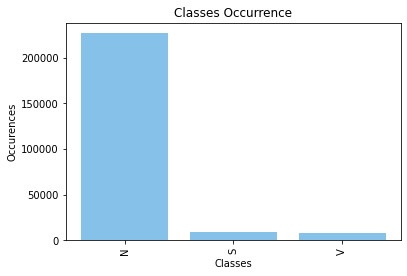

In [9]:
# Plot labels distribution (of all beats of all patients)
plt.bar(x=classes_name,height=counts, facecolor ='#85c1e9')
plt.title("Classes Occurrence", color = "black")
plt.tick_params(axis="both", colors = "black")
plt.xlabel("Classes", color = "black")
plt.ylabel("Occurences", color = "black")
plt.xticks(rotation=90)
plt.yticks
plt.show()

# Plot intervals boxplot

In [10]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 5.5 MB/s 


In [11]:
import neurokit2 as nk

In [12]:
# Utility: given the filename of a signal it returns the sampling frequency
def ecg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

[230338]
230400
{'ECG_R_Peaks': array([    29,    110,    191, ..., 230184, 230261, 230338], dtype=int32), 'sampling_rate': 128}


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(-1.0, 3.0)

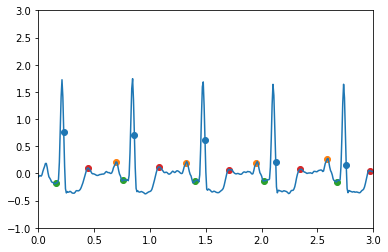

In [88]:
# PLOT SIGNAL EXAMPLE

# extract a sample ecg 
ecg_sample = np.asarray(ecgs[1]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[1]) 
ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
 
#Extract peaks from traning set and their labels 
sample_rpeaks = rpks[1]['rpeaks'] 
rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling} 
print(sample_rpeaks[-1])
ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2') 

print(len(ecg_signal))
print(rpeaks)

_, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=sampling, method="dwt")

# Plot an example of signal (last ecg in previous loop)

#drop null values
for key in waves_peak.keys():
 waves_peak[key] = [w for w in waves_peak[key] if math.isnan(w) == False]

#create waves_peak in time domain in order to plot the value in the time domain
waves_peak_td = dict()
waves_peak_td['ECG_P_Peaks'] = [w / sampling for w in waves_peak['ECG_P_Peaks'] ]
waves_peak_td['ECG_Q_Peaks'] = [w / sampling for w in waves_peak['ECG_Q_Peaks'] ]
waves_peak_td['ECG_T_Peaks'] = [w / sampling for w in waves_peak['ECG_T_Peaks'] ]
waves_peak_td['ECG_R_Onsets'] = [w / sampling for w in waves_peak['ECG_R_Onsets'] ]
waves_peak_td['ECG_P_Onsets'] = [w / sampling for w in waves_peak['ECG_P_Onsets'] ]
waves_peak_td['ECG_T_Offsets'] = [w / sampling for w in waves_peak['ECG_T_Offsets'] ]

plt.plot(ecg_sample_, ecg_signal)
plt.scatter(rpeaks['ECG_R_Peaks']/sampling, ecg_signal[rpeaks['ECG_R_Peaks']])
plt.scatter(waves_peak_td['ECG_P_Peaks'], ecg_signal[waves_peak['ECG_P_Peaks']])
plt.scatter(waves_peak_td['ECG_Q_Peaks'], ecg_signal[waves_peak['ECG_Q_Peaks']])
plt.scatter(waves_peak_td['ECG_T_Peaks'], ecg_signal[waves_peak['ECG_T_Peaks']])

plt.xlim(0,3)
plt.ylim(-1,3)

In [20]:
# Exploration over some intervals of various single-beat signal

# lists that will contain PR and QR intervals
PR_N = list()
PR_S = list()
PR_V = list()

P_N = list()
P_S = list()
P_V = list()

QR_N = list()
QR_S = list()
QR_V = list()

# interval lists filling loop
for i in tqdm(range(len(ecgs))):
  # extract a sample ecg
  ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64)
  sampling = ecg_freq(filenames[i])
  # Extract peaks from traning set and their labels
  sample_labels = anns[i]['labels']
  sample_rpeaks = rpks[i]['rpeaks']

  # clean ecg_sample
  ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2')

  # Handling last beats (if last rpeak is >= to current ecg lenght, we remove it)
  if sample_rpeaks[-1] >= len(ecg_signal):
    sample_labels = sample_labels[:-1]
    sample_rpeaks = sample_rpeaks[:-1]

  #_,rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sampling)
  # Building the dictionary with the rpeaks as the function of Neurokit wants
  rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling}
  
  _, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=sampling, method="dwt")
 
  #create waves_peak in time domain in order to plot the value in the time domain
  waves_peak_td = dict()

  #init the dictionary
  for k in waves_peak.keys():
    waves_peak_td[k] = list()

  for k in waves_peak.keys():
    for i in range(len(waves_peak[k])):
      if(math.isnan(waves_peak[k][i]) == False): #if is not nan, I divide the value for the frequency
        waves_peak_td[k].append(waves_peak[k][i] / sampling)
      else:
        waves_peak_td[k].append(waves_peak[k][i])  

  # add to the correct interval list the invterval of each beat of the current ecg sample

  for beat_index in range(len(sample_labels)):
    if sample_labels[beat_index] == 'N':
      try:
        P_N.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        P_N.append(math.nan)
      try:
        PR_N.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid index; Adding nan")
        PR_N.append(math.nan)
      try:  
        QR_N.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid index; Adding nan")
        QR_N.append(math.nan)
    elif sample_labels[beat_index] == 'S':
      try:
        P_S.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        P_S.append(math.nan)  
      try:
        PR_S.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid index; Adding nan")
        PR_S.append(math.nan)
      try:  
        QR_S.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid index; Adding nan")
        QR_S.append(math.nan)
    else:
      try:
        P_V.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        P_V.append(math.nan)  
      try:
        PR_V.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid index; Adding nan")
        PR_V.append(math.nan)
      try: 
        QR_V.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid index; Adding nan")
        QR_V.append(math.nan)

  1%|          | 1/105 [00:31<54:38, 31.52s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  4%|▍         | 4/105 [01:48<44:10, 26.24s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  8%|▊         | 8/105 [03:41<46:56, 29.04s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

Not valid index; Adding nan


 46%|████▌     | 48/105 [24:03<29:53, 31.46s/it]

Not valid index; Adding nan


 47%|████▋     | 49/105 [24:26<26:56, 28.86s/it]

Not valid index; Adding nan


 48%|████▊     | 50/105 [24:51<25:26, 27.75s/it]

Not valid index; Adding nan


 50%|████▉     | 52/105 [25:39<22:47, 25.81s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 55%|█████▌    | 58/105 [28:43<25:18, 32.31s/it]

Not valid index; Adding nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 58%|█████▊    | 61/105 [30:00<20:12, 27.55s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 65%|██████▍   | 68/105 [33:17<16:59, 27.54s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 66%|██████▌   | 69/105 [

Not valid index; Adding nan


 83%|████████▎ | 87/105 [41:49<07:53, 26.29s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 86%|████████▌ | 90/105 [42:55<05:48, 23.20s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 87%|████████▋ | 91/105 [43:19<05:25, 23.23s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dt

In [91]:
print(len(PR_N))
print(len(PR_V))
print(len(PR_S))

226930
7795
9609


In [92]:
#Flatten the structure of the array
PR_N = [item for sublist in PR_N for item in sublist]
PR_V = [item for sublist in PR_V for item in sublist]
PR_S = [item for sublist in PR_S for item in sublist]

TypeError: ignored

In [93]:
#Flatten the structure of the array
QR_N = [item for sublist in QR_N for item in sublist]
QR_V = [item for sublist in QR_V for item in sublist]
QR_S = [item for sublist in QR_S for item in sublist]

TypeError: ignored

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'PR_N': PR_N[0:len(PR_V)], 'PR_V': PR_V, 'PR_S': PR_S[0:len(PR_V)] })
sns.boxplot(data=df)


ValueError: ignored

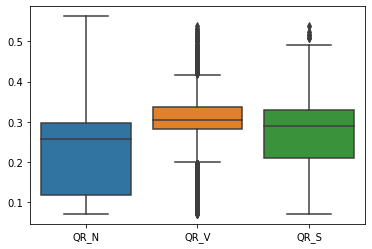

In [76]:
df1 = pd.DataFrame({'QR_N': QR_N[0:len(QR_V)], 'QR_V': QR_V, 'QR_S': QR_S[0:len(QR_V)]})
sns.boxplot(data = df1)

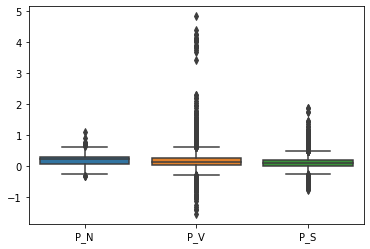

In [80]:
df2 = pd.DataFrame({'P_N': P_N[0:len(P_V)], 'P_V': P_V, 'P_S': P_S[0:len(P_V)]})
sns.boxplot(data = df2)

# Single heartbeat extraction

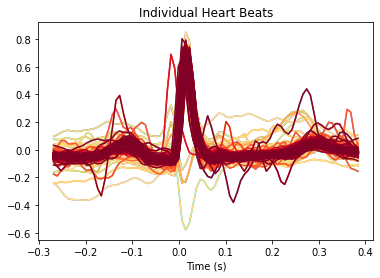

In [ ]:
# extract a sample ecg 
ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
 
#Extract peaks from traning set and their labels 
sample_rpeaks = rpks[0]['rpeaks'] 
rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling} 
 
ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2') 
 
# extract heartbeats of current ecg 
ecg_heartbeats = nk.ecg_segment(ecg_cleaned=ecg_signal, rpeaks=rpeaks['ECG_R_Peaks'], sampling_rate=sampling, show=True)

In [ ]:
# Try to extract each single heartbeat

# list of list that contains all heartbeats divided by patient
patient_heartbeats = []

for i in tqdm(range(len(ecgs))):
  # extract a sample ecg
  ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64)
  sampling = ecg_freq(filenames[i])
  #ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)

  # Handling last beats (if last rpeak is >= to current ecg lenght, we remove it)
  if sample_rpeaks[-1] >= len(ecg_signal):
    sample_labels = sample_labels[:-1]
    sample_rpeaks = sample_rpeaks[:-1]
  #Extract peaks from traning set and their labels
  sample_rpeaks = rpks[i]['rpeaks'] 
  rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling}

  # clean ecg_sample
  ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2')

  # extract heartbeats of current ecg
  ecg_heartbeats = nk.ecg_segment(ecg_cleaned=ecg_signal, rpeaks=rpeaks['ECG_R_Peaks'], sampling_rate=sampling)
  patient_heartbeats.append(ecg_heartbeats)

  

0
1
2
3
4


ValueError: ignored